# **Topic: Underwater seagrass classification using Inception V3**

# Inception V3 Model (Final Version)


### References:
1. https://keras.io/guides/transfer_learning/
2. https://keras.io/api/applications/#usage-examples-for-image-classification-models
3. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator?version=nightly
4. https://keras.io/api/applications/#usage-examples-for-image-classification-models

### Mount gdrive & Extract the dataset in Colab

>  After mounting the drive, use shutil to exract any archive formats (e.g., “zip”, “tar”, “gztar”, “bztar”, “xztar”)

```
import shutil
shutil.unpack_archive("/content/drive/MyDrive/dataset/DeepSeagrass.tar.xz", "/drive/MyDrive/dataset")
```

> To save the data into google drive in any specipfied location, run below command.


```
!apt install unzip
!unzip -u "/content/drive/MyDrive/dataset/DeepSeagrass.zip" -d "/content/drive/MyDrive/dataset/DeepSeagrass" 
```


> To extract the dataset temporarily in colab directly, run below command. It will save gdrive space.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pwd #to know the drive path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
!unzip drive/My\ Drive/dataset/DeepSeagrass.zip   

Streaming output truncated to the last 5000 lines.
  inflating: DeepSeagrass/Training/Strappy/Image213_Row2_Col2.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image213_Row4_Col1.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image214_Row1_Col5.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image214_Row4_Col5.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row1_Col3.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row2_Col2.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row3_Col6.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row4_Col1.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row4_Col6.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row1_Col0.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row2_Col2.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row2_Col5.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row3_Col1.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row3_Col6.jpg

## Now to check the extracted dataset, display any image using keras.

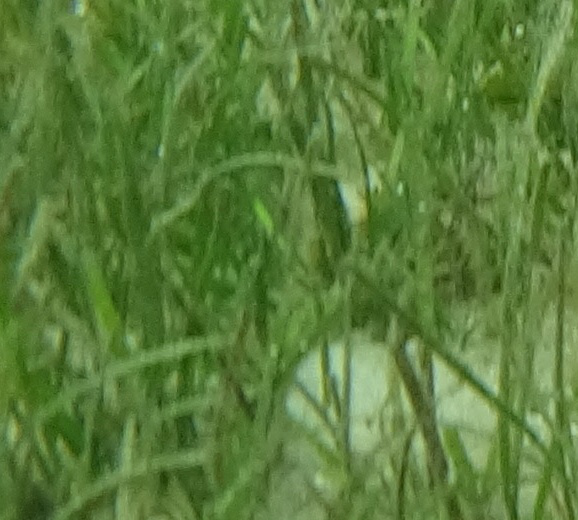

In [ ]:
#!pip install tensorflow==2.7.0
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('DeepSeagrass/Training/Strappy/Image358_Row2_Col2.jpg')
img

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Sun Jun 12 07:39:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf. __version__

'2.8.2'

In [ ]:
# GPU scheduler for pc
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# **Basics of CNN**
### Let's discuss  about some important terms before coding


*  **Convolution** - The process of transforming an image by applying a kernel over each pixel and its local neighbors across the entire image.
*   **Pooling** - Pooling is the process used to reduce the dimensions of the feature map. There are different types of pooling but the most common ones are max pooling and average pooling.



## a) [Keras Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers?version=nightly) 
> A layer can be any kind of data transformation.

> Dense Layer : Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of input, called Dense Layer.

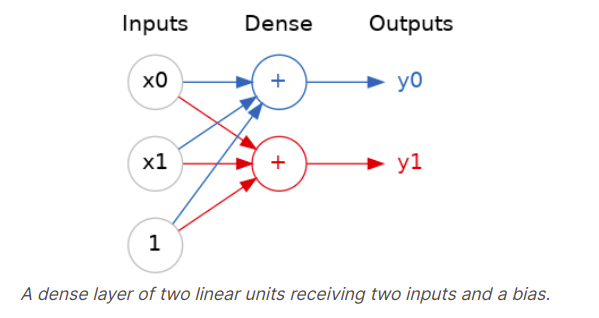


## b) Activation Function: 

> An activation function is simply some function we apply to each of a layer's outputs (its activations). The most common is the rectifier function (ReLU) = max(0,x). When we attach the rectifier to a linear unit, we get a rectified linear unit or ReLU. 

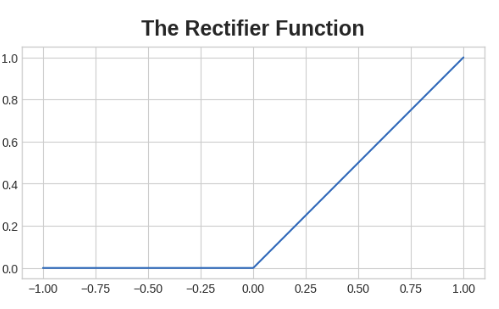


> Without activation functions, neural networks can only learn linear relationships. In order to fit curves, need to use activation functions.


![image.png](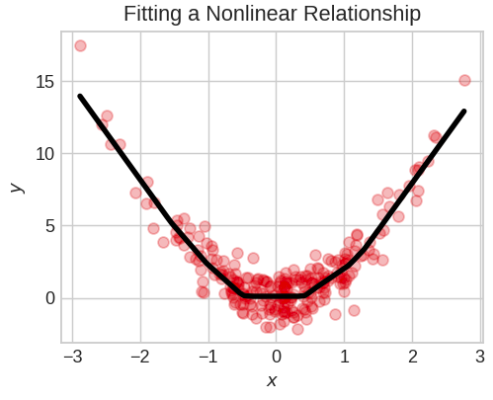
)

## c) Stacking Dense Layers:

> Now, we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

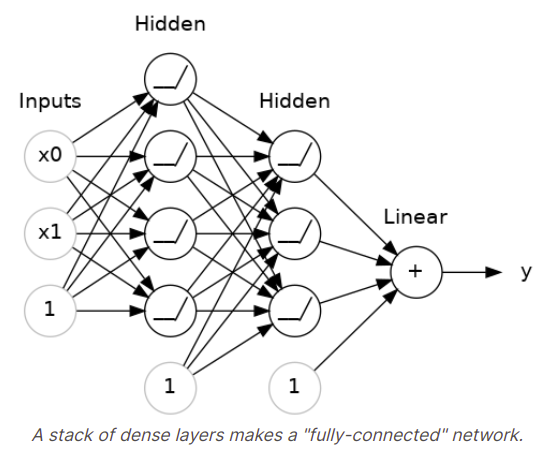

> Note, the final (output) layer is a linear unit (meaning, no activation function) which is best for a regression task. Other tasks (like classification) might require an activation function in the output layer.










## Define the layers





1.   **GlobalAveragePooling2D :** only one Feature per Feature map is selected by averaging every elements of the Feature Map.
e.g. if your global average pooling layer input is 220 x 220 x 30 you will find 1x1x30 output.
It means that you are finding a global representative feature from every slice. That is Global Average Pooling.

>  It is used over feature maps in the classification layer, that is easier to interpret and less prone to overfitting than a normal fully connected layer.


2. **Flattening :** is simply converting a multi-dimensional feature map to a single dimension without any kinds of feature selection.  



>**Notes:**  Excerpt from Hands-On Machine Learning by Aurélien Géron
the global average pooling layer outputs the mean of each feature map: this drops any remaining spatial information, which is fine because there was not much spatial information left at that point. Indeed, GoogLeNet input images are typically expected to be 224 × 224 pixels, so after 5 max pooling layers, each dividing the height and width by 2, the feature maps are down to 7 × 7. Moreover, it is a classification task, not localization, so it does not matter where the object is. Thanks to the dimensionality reduction brought by this layer, there is no need to have several fully connected layers at the top of the CNN (like in AlexNet), and this considerably reduces the number of parameters in the network and limits the risk of overfitting.

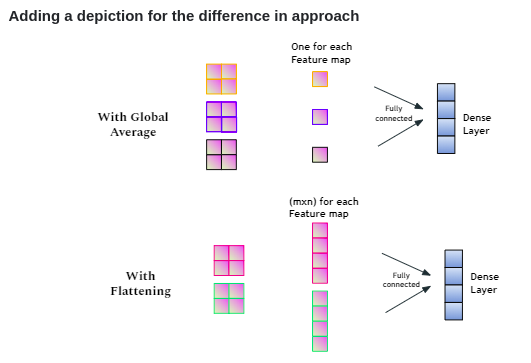







In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,  GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
#from data_loader import loadData


In [ ]:
# re-size all the images to this
#IMAGE_SIZE = [224, 224]
CLASSES = ["Strappy", "Ferny", "Rounded", "Background"]
NUM_ROWS = 5
NUM_COLS = 8
CROP_SHAPE = [int(2600//NUM_ROWS), int(4624//NUM_COLS)]  # image_size= [520,578] pixels
BATCH_SIZE= 32


TRAIN_PATH = '/content/DeepSeagrass/Training'
VAL_PATH = '/content/DeepSeagrass/Validate'
#train_data, val_data = loadData(CLASSES, TRAIN_PATH, VAL_PATH, BATCH_SIZE)

In [ ]:
# Here use imagenet weights, a pretrained database to save training time
# Don't add imagent weight at top of the layer so, include_top =False

inception = InceptionV3(input_shape=CROP_SHAPE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in inception.layers:
    layer.trainable = False

In [ ]:
#Make sure to install glob2 beforehand if you're using tf gpu, otherwise, will show error during model fitting due to glob won't load training classes length
#Hence in Dense layer(No. of class),  i/p and o/p  classlength get mismatched

#!pip install glob2

In [ ]:
# for getting number of train and test output classes
folders = glob('/content/DeepSeagrass/Training/**')
folders1 = glob('/content/DeepSeagrass/Validate**')

print("Train classes :", folders)
print("Test classes :", folders1)

Train classes : ['/content/DeepSeagrass/Training/Strappy', '/content/DeepSeagrass/Training/Ferny', '/content/DeepSeagrass/Training/Rounded', '/content/DeepSeagrass/Training/Background']
Test classes : ['/content/DeepSeagrass/Validate']


In [ ]:
# add a global spatial average pooling layer
# layers - you can add more if you want
#x = Flatten()(inception.output) #Flatten used for a fully connected layer
x = inception.output
x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer/output layer -- with the no. of classes present in training dataset
prediction = Dense(len(folders), activation='softmax')(x)

## Create 1-1 model with Inception v3

### **First, Let's understand what's inception v3**
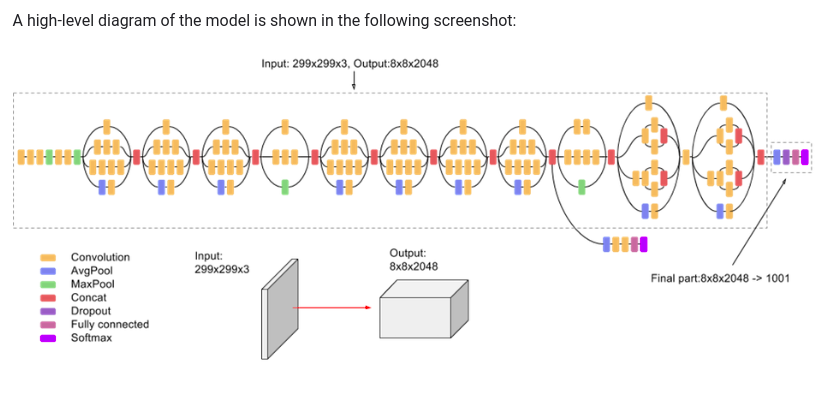

### **Components of Inception V3 model:** 

> In total, made up of 42 layers which is a bit higher than the previous inception V1 and V2 models. But the efficiency of this model is really impressive.

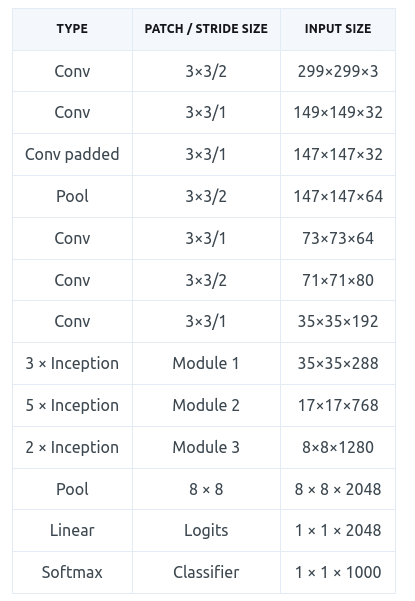



In [ ]:
# this is the model we will train

from tensorflow.keras.models import Model

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
#structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 520, 578, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 259, 288, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 259, 288, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## Choose the appropriate optimizer and cost method


> optimizers have 2 families: gradient descent optimizers and adaptive optimizers. 
This division is exclusively based on an operational aspect which forces you to manually tune the learning rate in the case of Gradient Descent algorithms while it is automatically adapted in adaptive algorithms — that’s why we have this name.


1.   **Gradient Descent:**


> 

*   Batch gradient descent
*   Stochastic gradient descent
*   Mini-batch gradient descent

2.   **Adaptive:**

*   Adagrad
*   Adadelta
*   RMSprop
*   Adam

**Adam is the best among the adaptive optimizers in most of the cases.
Good with sparse data: the adaptive learning rate is perfect for this type of datasets.
There is no need to focus on the learning rate value.**


> Anyway, many recent papers state that **SGD** can bring to better results if combined with a good learning rate annealing schedule which aims to manage its value during the training. 



## Approach 1: Try Adam optimizer 1st because it is more likely to return good results without an advanced fine tuning.


## Approach 2: Implment SGD optimizer with min learning rate if the 1st approach doesn't yield a stable model







In [ ]:
# tell the model what cost and optimization method to use
#metrics_per_class = ["accuracy", tf.keras.metrics.Precision(class_id=0, name="precision_0"), tf.keras.metrics.Recall(class_id=0, name="recall_0"),
   #     tf.keras.metrics.Precision(class_id=1, name="precision_1"), tf.keras.metrics.Recall(class_id=1, name="recall_1"),
   #     tf.keras.metrics.Precision(class_id=2, name="precision_2"), tf.keras.metrics.Recall(class_id=2, name="recall_2"),
    #    tf.keras.metrics.Precision(class_id=3, name="precision_3"), tf.keras.metrics.Recall(class_id=3, name="recall_3")]


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Data preprocessing before training

1.   **Rescaling the dataset :**
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.
> we will standardize values between the range of [0, 1] range  using tf.keras.layers.
2.   Next, define the train and test directory with the preprocessed dataset




In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#tf.keras.preprocessing.image.ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Make sure to provide the same target size as initialied for the image size
train_data = train_datagen.flow_from_directory(
        '/content/DeepSeagrass/Training',
        target_size=CROP_SHAPE,
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical')


Found 42848 images belonging to 4 classes.


In [ ]:
val_data = test_datagen.flow_from_directory(
        '/content/DeepSeagrass/Validate',
        target_size=CROP_SHAPE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 8566 images belonging to 4 classes.


## **Train 1:** train the model on the new data for a few epoch

### Importing necessary callback libraries



*   Tensorboard: used to store changes of model in tensorboard dev which can be accessed later
*   ReduceLROnPlateau: used to reduce the learning rate if the accuracy doesn't improve after certain epochs





In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
import tensorflow as tf
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            #verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
# fit the model, It will take some time to execute
r1 = model.fit(
        x=train_data,
        validation_data=val_data,
        #steps_per_epoch=len(train_generator),
        epochs=10,
        callbacks=[es, learning_rate_reduction, tensorboard_callback],
        #validation_steps=len(validation_generator)
        steps_per_epoch=len(train_data) // BATCH_SIZE, 
        validation_steps=len(val_data) // BATCH_SIZE, 
        )

Epoch 1/10
41/41 [==============================] - 48s 704ms/step - loss: 0.3666 - accuracy: 0.8582 - val_loss: 0.1046 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 2/10
41/41 [==============================] - 27s 661ms/step - loss: 0.1216 - accuracy: 0.9596 - val_loss: 0.1117 - val_accuracy: 0.9727 - lr: 0.0010
Epoch 3/10
41/41 [==============================] - 26s 632ms/step - loss: 0.1193 - accuracy: 0.9581 - val_loss: 0.0841 - val_accuracy: 0.9727 - lr: 0.0010
Epoch 4/10
41/41 [==============================] - 28s 676ms/step - loss: 0.0916 - accuracy: 0.9703 - val_loss: 0.1574 - val_accuracy: 0.9492 - lr: 0.0010
Epoch 5/10
41/41 [==============================] - 28s 689ms/step - loss: 0.1018 - accuracy: 0.9672 - val_loss: 0.0678 - val_accuracy: 0.9688 - lr: 5.0000e-04
Epoch 6/10
41/41 [==============================] - 28s 690ms/step - loss: 0.0915 - accuracy: 0.9672 - val_loss: 0.0779 - val_accuracy: 0.9727 - lr: 5.0000e-04
Epoch 7/10
41/41 [==============================] - 27s 



> ## **Model Performance 1**


1.   Plot the train and validation Loss
2.   Plot the train and validation Accuracy
3.   Print avg test accuracy and loss
4.   Save the model




In [ ]:
test_loss, test_acc = model.evaluate(val_data, verbose=2)

268/268 - 121s - loss: 0.0737 - accuracy: 0.9782 - 121s/epoch - 452ms/step


In [ ]:
print('The Inception model, accuracy: {:5.2f}%'.format(100 * test_acc))
print('The Inception model, loss: {:5.2f}%'.format(100 * test_loss))

The Inception model, accuracy: 97.82%
The Inception model, loss:  7.37%


In [ ]:
 # save the trained model as keras HDF5 file format and reload to evaluate
 #loaded_model = load_model('inceptionmodelr1.h5')
from tensorflow.keras.models import load_model

model.save("finalinceptionmodel.h5")


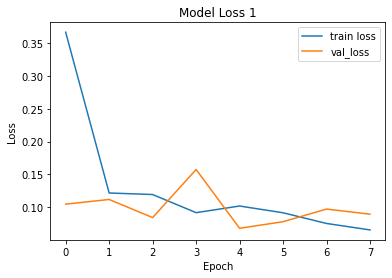

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(r1.history['loss'], label='train loss')
plt.plot(r1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss 1')
plt.savefig('LossVal_loss')

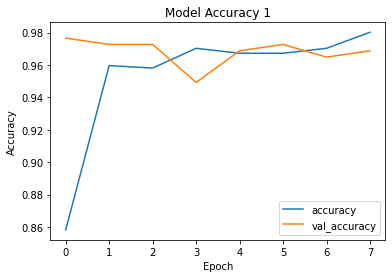

In [ ]:
# plot the accuracy
plt.plot(r1.history['accuracy'], label='accuracy')
plt.plot(r1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy 1')
plt.savefig('AccVal_acc')


# Approach 2: **Tuning the Model with SGD optimizer:**
At this point, the top layers are well trained and we can start fine-tuning convolutional layers from inception V3. We will freeze the bottom N layers and train the remaining top layers.





> # let's visualize layer names and layer indices to see how many layers, we should freeze:





In [ ]:
for i, layer in enumerate(inception.layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [ ]:
# Let's to train the top 2 inception blocks, i.e. we will freeze the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True


#model.trainable= True  ##to train whole model

In [ ]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.0001, momentum=0.9), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 520, 578, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 259, 288, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 259, 288, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## **Dataset Augmentation**

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.3,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=90,
        brightness_range=[0.2,1.0],
        
        #fill_mode='reflect' #good for natural images else select 'nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
        '/content/DeepSeagrass/Training',
        target_size=CROP_SHAPE,
        shuffle=True,
        batch_size=BATCH_SIZE,
        interpolation='nearest',
        class_mode='categorical')

val_data = test_datagen.flow_from_directory(
        '/content/DeepSeagrass/Validate',
        target_size=CROP_SHAPE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 42848 images belonging to 4 classes.
Found 8566 images belonging to 4 classes.


## **Train 2:** # we train our model again (this time fine-tuning the top 2 inception blocks alongside the top Dense layers



In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
import tensorflow as tf
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
#es = tf.keras.callbacks.EarlyStopping(patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            #verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
# use early stopping to break the learning process if the model stop learning during 3 epochs

r2 = model.fit(
        x=train_data,
        epochs=80,
        callbacks=[tensorboard_callback,learning_rate_reduction],
        validation_data=val_data,

        steps_per_epoch=len(train_data) //BATCH_SIZE,
        validation_steps=len(val_data) //BATCH_SIZE  
)

Epoch 1/80
41/41 [==============================] - 116s 3s/step - loss: 0.2471 - accuracy: 0.9146 - val_loss: 0.0904 - val_accuracy: 0.9727 - lr: 5.0000e-05
Epoch 2/80
41/41 [==============================] - 112s 3s/step - loss: 0.2082 - accuracy: 0.9238 - val_loss: 0.0454 - val_accuracy: 0.9922 - lr: 5.0000e-05
Epoch 3/80
41/41 [==============================] - 114s 3s/step - loss: 0.2133 - accuracy: 0.9268 - val_loss: 0.1081 - val_accuracy: 0.9727 - lr: 5.0000e-05
Epoch 4/80
41/41 [==============================] - 113s 3s/step - loss: 0.1755 - accuracy: 0.9360 - val_loss: 0.0743 - val_accuracy: 0.9727 - lr: 5.0000e-05
Epoch 5/80
41/41 [==============================] - 115s 3s/step - loss: 0.1814 - accuracy: 0.9352 - val_loss: 0.1317 - val_accuracy: 0.9531 - lr: 5.0000e-05
Epoch 6/80
41/41 [==============================] - 114s 3s/step - loss: 0.2125 - accuracy: 0.9223 - val_loss: 0.0822 - val_accuracy: 0.9648 - lr: 2.5000e-05
Epoch 7/80
41/41 [==============================] - 

## **Model Performance 2**


1.   Plot the train and validation Loss
2.   Plot the train and validation Accuracy
3.   Print avg test accuracy and loss
4.   Save the model

In [ ]:
test_loss, test_acc = model.evaluate(val_data, verbose=2)
print('The Inception tuned model, accuracy: {:5.2f}%'.format(100 * test_acc))

268/268 - 119s - loss: 0.0849 - accuracy: 0.9740 - 119s/epoch - 444ms/step
The Inception tuned model, accuracy: 97.40%


In [ ]:
print('The Inception tuned model, loss: {:5.2f}%'.format(100 * test_loss))

The Inception tuned model, loss:  8.49%


In [ ]:
 # save the trained model as keras HDF5 file format and reload to evaluate
from tensorflow.keras.models import load_model

model.save("finaltuned_inceptionmodel.h5")

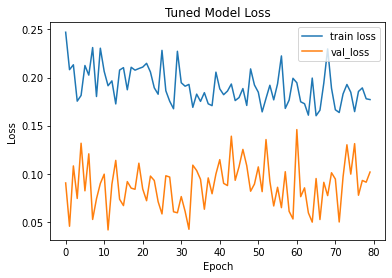

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Tuned Model Loss')
plt.savefig('LossVal_loss1')

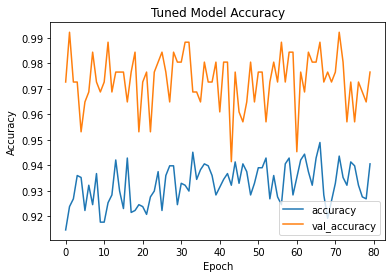

In [ ]:
# plot the accuracy
plt.plot(r2.history['accuracy'], label='accuracy')
plt.plot(r2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Tuned Model Accuracy')
plt.savefig('AccVal_acc1')

# Reloading the saved tuned model and evaluate with single image

In [ ]:
from tensorflow.keras.models import load_model

loaded_model= load_model("/content/drive/MyDrive/dataset/inceptionmodelr2.h5")

In [ ]:
loaded_model.summary()

In [ ]:
loss, acc = loaded_model.evaluate(validation_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
# for getting number of train and test output classes
folders = glob('/content/DeepSeagrass/Training/**')
folders1 = glob('/content/DeepSeagrass/Test/**')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
get_label_name = info.features["label"].int2str

In [ ]:
image_path="/content/DeepSeagrass/Validate/Strappy/Image10_Row2_Col4.jpg"
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
plt.title(folders.get_label_name(result[0][0]))
print(result)
plt.show()

#### Multiclass classification


In [ ]:
#@title
#import random
#import numpy as np
#val_path= '/content/DeepSeagrass/Validate'
#test_path= '/content/DeepSeagrass/Test'

#test_img_num= random.randint(0, len('test_path'))
#test_img= test_path(test_img_num)

#test_img_ip= np.expand_dims(test_img, 0)
#ground_truth=np.argmax(val_path[test_img_num], axis=None)


In [ ]:
#pred= model.predict(test_img_ip)

In [ ]:
#pred_class=np.argmax(pred, axis=None)

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(test_img)

In [ ]:
org_label= CLASSES[ground_truth]
pred_label=CLASSES[pred_class]

In [ ]:
print("The original class is: ", org_label)
print("The predicted class is: ", pred_label)